# Линейная регрессия

**Выполнил студент ФИО**

Решение задачи регрессии в scikit-learn с помощью линейной модели - линейная регрессия

- Обучение класса SGDRegressor и анализ атрибутов
- Анализ модели для разных данных
- Предобразование целевой переменной с помощью класса TransformedTargetRegressor
- Сохранение модели

## Установка и импорт библиотек

In [62]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install plotly
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

from sklearn.compose import TransformedTargetRegressor # ддля обрабоки целевой переменной

import warnings
warnings.filterwarnings('ignore')

# Описание датасета

'Laptop': Уникальный идентификатор или название модели ноутбука.

'Status': Новый или бывший в ремонте

'Brand': Производитель ноутбука

'Model': Модель ноутбука

'CPU' (центральный процессор): Марка, модель процессора и другие важные сведения

'GPU' (графический процессор): Марка, модель видеокарты и связанные с ней технические характеристики

'RAM' (оперативная память): Объем памяти

'Storage':  Емкость накопителя

'Storage type': Тип накопителя

'Screen': Диагональ экрана в дюймах

'Touch': Есть или нет тачскрин

'Final Price': Стоимость ноутбука в соответствующей валюте

Ссылка на датасет: https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset

In [64]:
df = pd.read_csv('Books_Data_Clean.csv')  # Считываем файл в DataFrame
df.head(5)  # Посмотрим первые пять записей

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [65]:
df = df.dropna(subset=['Book Name'])  # Удалим записи с пропусками.
df['language_code'].fillna('eng', inplace = True)  # Заменим пропуски на самое часто встречающее значение - eng

In [66]:
df = df.drop(['index', 'Book Name'], axis=1) #Дубликаты
df = df.drop(['units sold', 'publisher revenue', 'sales rank'], axis=1) #Результативные

In [67]:
df['Publishing Year'] = 2024 - df['Publishing Year']
df.rename(columns = {'Publishing Year':'Age'}, inplace = True )

In [68]:
df.info()  # Выведем краткую сводку по датафрейму

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1047 non-null   float64
 1   Author               1047 non-null   object 
 2   language_code        1047 non-null   object 
 3   Author_Rating        1047 non-null   object 
 4   Book_average_rating  1047 non-null   float64
 5   Book_ratings_count   1047 non-null   int64  
 6   genre                1047 non-null   object 
 7   gross sales          1047 non-null   float64
 8   sale price           1047 non-null   float64
 9   Publisher            1047 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 90.0+ KB


In [69]:
df.head(5)

,Age,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,sale price,Publisher
0,49.0,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,4.88,HarperCollins Publishers
1,37.0,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,1.99,HarperCollins Publishers
2,9.0,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,8.69,"Amazon Digital Services, Inc."
3,16.0,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,7.50,Hachette Book Group
4,13.0,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,7.99,Penguin Group (USA) LLC


## Числовые и категориальные признаки

Из предварительной обработки исключена колонка Final Price (поскольку она является целевой переменной и будет обработана отдельно)
и колонка Laptop (поскольку она дублирует другие колонки)

In [70]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [71]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [72]:
# Pipeline для числовых признаков

num_pipe_num = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01, )),
    ('norm', MinMaxScaler())
])
 
num = ['Age', 'Book_average_rating', 'Book_ratings_count', 'sale price']

# И для категориальных признаков

cat_pipe_Status_Touch = Pipeline([
    ('encoder', OrdinalEncoder())
])


cat_Status_Touch = ['Author_Rating', 'genre']

cat_pipe = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat = ['Author_Rating', 'Author', 'language_code', 'genre', 'Publisher']


# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num', num_pipe_num, num),
])


# И полный Pipeline со всеми признаками
preprocessors_All = ColumnTransformer(transformers=[
    ('norm', num_pipe_num, num),
    ('Status_Touch', cat_pipe_Status_Touch, cat_Status_Touch),
    ('cat', cat_pipe, cat)
])

In [73]:
columns_num = np.hstack([num])

# Линейная Регрессия

In [74]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.model_selection import train_test_split  # Функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit  # При кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate  # Функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse  # Метрика MSE от Scikit-learn
from sklearn.metrics import r2_score  # Коэффициент детерминации R2 от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay  # Класс визуализации ошибок модели

In [75]:
# Не забываем удалить целевую переменную цену из признаков
X,y = df.drop(columns = ['gross sales']), df['gross sales']

# Разбиваем датасет на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [76]:
X_train  # Посмотрим содержимое обучающей выборки

,Age,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,sale price,Publisher
287,23.0,"Stephen King, William Olivier Desmond",fre,Intermediate,3.59,115855,genre fiction,4.99,"Amazon Digital Services, Inc."
272,25.0,"Natsuki Takaya, Alethea Nibley, Athena Nibley",eng,Intermediate,4.23,118467,nonfiction,2.99,Simon and Schuster Digital Sales Inc
508,15.0,"Seth Grahame-Smith, Jane Austen",eng,Novice,3.28,103995,genre fiction,3.82,"Amazon Digital Services, Inc."
579,10.0,Colleen Hoover,eng,Excellent,4.33,81707,genre fiction,6.83,Random House LLC
849,38.0,Art Spiegelman,en-GB,Famous,4.53,76785,nonfiction,0.99,"Amazon Digital Services, Inc."
...,...,...,...,...,...,...,...,...,...
337,79.0,"Astrid Lindgren, Lauren Child, Florence Lambor...",eng,Excellent,4.11,123065,genre fiction,3.99,"Amazon Digital Services, Inc."
476,20.0,Chelsea Handler,en-GB,Intermediate,3.79,83607,nonfiction,7.66,Simon and Schuster Digital Sales Inc
124,13.0,Ally Condie,eng,Intermediate,3.52,100886,genre fiction,0.99,"Amazon Digital Services, Inc."
1067,94.0,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,7.99,Hachette Book Group


# Оценим модель с использованием только числовых признаков

In [77]:
#  На тренировочных данных делаем fit_transform - одновременно и обучаемся, и преобразуем тренировочные данные
X_train_prep = preprocessors_num.fit_transform(X_train)
# После на валидационных данных делаем уже только transform - преобразуем данные согласно ранее запомненным параметрам, полученным на тренировочной выборке
X_val_prep = preprocessors_num.transform(X_val)

### Обучаем модель

In [78]:
model = SGDRegressor(random_state = 42)  # Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. 
                                         # Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь 
                                         # одни и те же значения при каждом вызове.

model.fit(X_train_prep, y_train);  # Обучаем модель на тренировочной выборке

## Подготовим несколько функций для анализа обученной модели

Извлечение коэффициентов из модели

In [79]:
def get_coefs(model):  # model: наша обученная модель

    B0 = model.intercept_[0]
    B = model.coef_
    return B0, B

In [80]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

## Визуализации весов в виде столбчатых диаграмм

In [81]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers]  # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Напишем уравнение модели

In [82]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
-1921.105+204.00*Age-1018.98*Book_average_rating+8132.64*Book_ratings_count+4096.44*sale price


### Визуализируем веса в виде столбчатых диаграмм

In [83]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Видно, что признаки RAM и Storage в модели имеют наибольшие коэффициенты, следовательно, они больше влияют на целевой показатель - цену. Также признак Screen имеет отрицательный коэффициент - это означает, что ноутбуки с большей диагональю будут дешевле, что не очевидно.

### Оценка метрик

In [84]:
def calculate_metric(model_pipe, X, y, metric = r2_score, **kwargs):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model, **kwargs)

In [85]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.3535
r2 на валидационной выборке: 0.2668
mse на тренировочной выборке: 8602643.7809
mse на валидационной выборке: 15088028.3631
rmse на тренировочной выборке: 2933.0264
rmse на валидационной выборке: 3884.3311


## Кросс-валидация

In [86]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [87]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [88]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.011000,0.003002,0.313014,-2.079011e+07,-1945.403451,-29075.401366
1,0.009997,0.003003,0.131962,-1.967288e+06,-1120.098106,-3956.439595
2,0.011998,0.002000,0.448177,-3.880113e+06,-1247.273069,-11130.415493
3,0.008999,0.002005,0.205626,-2.061329e+06,-1125.238769,-3952.250429
4,0.006994,0.001000,0.339519,-9.471696e+06,-1704.355083,-15308.706807




test_R2      2.876596e-01
test_-MSE   -7.634107e+06
test_-MAE   -1.428474e+03
test_-Max   -1.268464e+04
dtype: float64


### Визуализация ошибок от scikit-learn

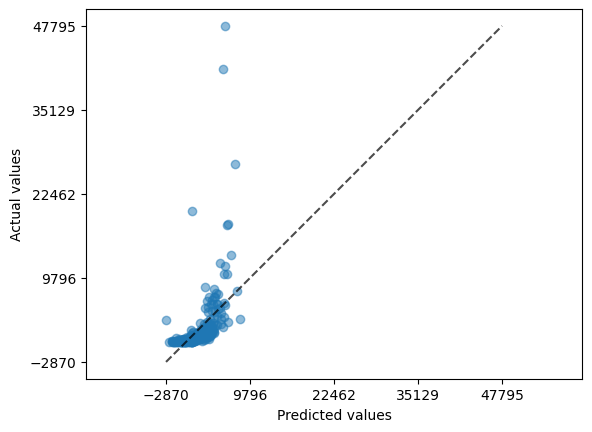

In [89]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Используя только 3 числовых признака можно с достаточно большой погрешностью предсказывать цены

* Результаты сильно кластеризуются - сказывается влияние ограниченного числа значений у числовых признаков

* Больше проблем при предсказании высоких цен

* Увеличение объема памяти и оперативной памяти положительно сказывается на цене, размер экрана - отрицательно



## Объединяем Pipeline Предобработки и Модель

In [90]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

In [91]:
pipe_num['model']

SGDRegressor(random_state=42)

In [92]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price'])])),
                ('model', SGDRegressor(random_state=42))])

In [93]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-1921.105+204.00*Age-1018.98*Book_average_rating+8132.64*Book_ratings_count+4096.44*sale price


In [94]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.3535
r2 на валидационной выборке: 0.2668
mse на тренировочной выборке: 8602643.7809
mse на валидационной выборке: 15088028.3631
rmse на тренировочной выборке: 2933.0264
rmse на валидационной выборке: 3884.3311


In [95]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.016000,0.006003,0.321470,-2.053422e+07,-1947.256499,-28920.405888
1,0.015995,0.005000,0.114183,-2.007581e+06,-1132.478842,-3991.403016
2,0.014999,0.005002,0.448099,-3.880662e+06,-1266.076719,-11000.760437
3,0.014004,0.005004,0.150399,-2.204638e+06,-1176.829641,-3460.784383
4,0.013994,0.004998,0.418041,-8.345645e+06,-1548.947755,-15419.375602




test_R2      2.904383e-01
test_-MSE   -7.394550e+06
test_-MAE   -1.414318e+03
test_-Max   -1.255855e+04
dtype: float64


## Оценим влияние предварительной обработки целевой переменной

In [96]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [97]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [98]:
B0, B = get_coefs(pipe_num_transform['model'].regressor_)
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-1.149+0.01*Age-0.31*Book_average_rating+1.90*Book_ratings_count+2.10*sale price


In [99]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Смещение (член нулевого порядка) стал отрицательным и сильно уменьшился по модулю, влияние RAM уступило влиянию Storage, остальные соотношения без критичных изменений.

In [100]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.014996,0.005002,0.101709,-2.718479e+07,-1770.937093,-31882.589077
1,0.014000,0.003998,0.323777,-1.532566e+06,-629.301424,-5292.333180
2,0.013001,0.003999,0.588483,-2.893555e+06,-639.412858,-10052.786271
3,0.013000,0.004000,0.389712,-1.583643e+06,-560.428726,-5743.891418
4,0.012999,0.005000,0.179885,-1.176095e+07,-1357.618317,-18414.032786




test_R2      3.167132e-01
test_-MSE   -8.991100e+06
test_-MAE   -9.915397e+02
test_-Max   -1.427713e+04
dtype: float64


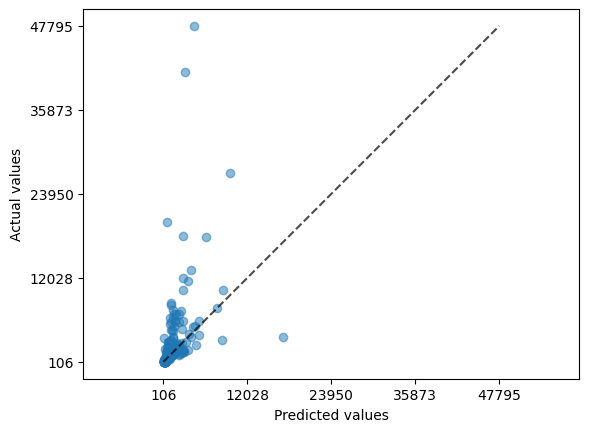

In [101]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Предварительная обработка целевой переменной в данном случае не улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.47 против 0.58)

* В целом предварительная обработка целевой переменной сделала хуже предсказание высоких значений цен

* В области низких цен кластеризация несколько уменьшилась, но не ушла полностью (косвенно подтверждает гипотезу о влиянии ограниченного набора значений числовых признаков)



# Оценим влияние категориальных признаков

In [102]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_All),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [103]:
pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price']),
                                                 ('Status_Touch',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Author_Rating', 'genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Author_Rating', 'Author',
                                                   'language_code', 'genre',
                                                   'Publisher'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [104]:
cat_Status_Touch_names = pipe_all_transform['preprocessors'].transformers_[1][
    1]['encoder'].get_feature_names_out(cat_Status_Touch)
cat_names = pipe_all_transform['preprocessors'].transformers_[2][1][
    'encoder'].get_feature_names_out(cat)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num, cat_Status_Touch, cat])

In [105]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
-0.414+0.01*Age+0.24*Book_average_rating+1.80*Book_ratings_count+1.82*sale price+0.01*Author_Rating-0.21*genre-0.32*Author_Rating-0.17*Author+0.06*language_code+0.02*genre+0.02*Publisher


In [106]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [107]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.08, width = 1800)

In [108]:
cat_names  # Можно посмотреть, что скрывается за индексами

array(['Author_Rating_Excellent', 'Author_Rating_Famous',
       'Author_Rating_Intermediate', 'Author_Rating_Novice',
       'Author_A.S.A. Harrison', 'Author_Agatha Christie',
       'Author_Alan Brennert',
       'Author_Aldous Huxley, Christopher Hitchens', 'Author_Alex Flinn',
       'Author_Alex Garland', 'Author_Alexandra Bracken',
       'Author_Alice Clayton',
       'Author_Allen Ginsberg, William Carlos Williams',
       'Author_Ally Carter', 'Author_Ally Condie',
       'Author_Amanda Hocking', 'Author_Amish Tripathi',
       'Author_Amor Towles', 'Author_Andre Dubus III',
       'Author_Andrew Clements, Brian Selznick', 'Author_Anita Diamant',
       'Author_Anita Shreve', 'Author_Ann Patchett',
       'Author_Anna Quindlen',
       'Author_Anne McCaffrey, Teodor PanasiÅ„ski', 'Author_Anne Rice',
       'Author_Anne Tyler', 'Author_Anonymous, Joseph Smith Jr.',
       'Author_Anthony Bourdain', 'Author_Aravind Adiga',
       'Author_Arnold Lobel', 'Author_Art Spiegelman',


In [109]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.3659
r2 на валидационной выборке: 0.2358
mse на тренировочной выборке: 8437813.7933
mse на валидационной выборке: 15725371.8952
rmse на тренировочной выборке: 2904.7915
rmse на валидационной выборке: 3965.5229


In [110]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 73))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.057997,0.009000,0.057644,-1.900083e+07,-1309.349245,-32172.312990
1,0.055000,0.010002,0.059302,-9.922863e+06,-1063.668802,-16929.614654
2,0.057998,0.009000,0.385735,-1.099038e+07,-1156.109806,-17434.680549
3,0.056008,0.009992,0.508679,-4.688288e+06,-768.076861,-15423.344349
4,0.056000,0.010000,0.540948,-7.165074e+06,-1005.513285,-14859.425054




test_R2      3.104619e-01
test_-MSE   -1.035349e+07
test_-MAE   -1.060544e+03
test_-Max   -1.936388e+04
dtype: float64


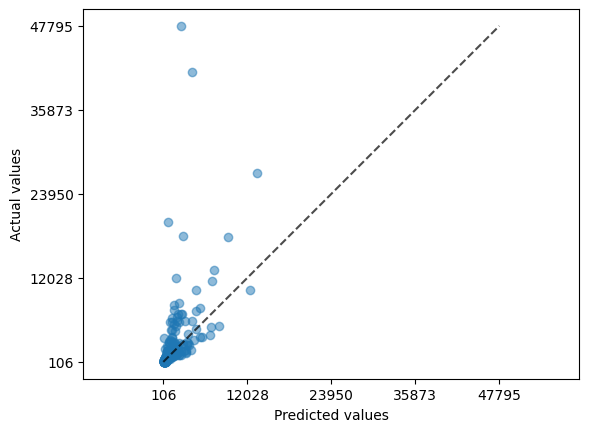

In [111]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Выводы по модели:

* Добавление категориальных признаков улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.74 против 0.58)

* Результаты так явно не кластеризуются

* Предсказание дорогих ноутбуков немного улучшилось, в предсказании средних по цене все еще проблема.

* Наиболее значимыми оказались числовые признаки: объем накопителя и оперативной памяти.

